<a href="https://colab.research.google.com/github/SakshiGehani/DeepLearning_J015/blob/master/DL_ClassTest1_J015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import packages
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical

#import dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()  ## Image dataset coloured

#change shape from image to vector
X_train = X_train.reshape(50000, 32 * 32 * 3)     ## taking 50000 images for training and 10000 for testing
X_test = X_test.reshape(10000, 32 * 32 * 3)

Using TensorFlow backend.


170500096/170498071 [==============================] - 5s 0us/step


In [0]:
#preprocess
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0                    ## to get values b/w 0 and 1
X_test /= 255.0

#change labels from numeric to one hot encoded
Y_train = to_categorical(y_train, 10)
Y_test =  to_categorical(y_test, 10)

In [0]:
#Model building
initializer = keras.initializers.glorot_normal(seed=None)
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), kernel_initializer=initializer, bias_initializer=initializer))
model.add(Activation('relu'))
model.add(Dense(512, kernel_initializer=initializer, bias_initializer=initializer))
model.add(Activation('relu'))
model.add(Dense(512, kernel_initializer=initializer, bias_initializer=initializer))
model.add(Activation('relu'))
model.add(Dense(10, kernel_initializer=initializer, bias_initializer=initializer))
model.add(Activation('softmax'))

In [0]:
from keras import optimizers
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=adamax,
              metrics=['accuracy'])

In [0]:
# training
history = model.fit(X_train, Y_train,
                        batch_size=256,
                        nb_epoch=20,          ## 20 epochs--51%acc
                        verbose=1,
                        validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """




Train on 50000 samples, validate on 10000 samples
Epoch 1/20





50000/50000 [==============================] - 12s 232us/step - loss: 2.2258 - acc: 0.2684 - val_loss: 1.8320 - val_acc: 0.3385
Epoch 2/20
50000/50000 [==============================] - 2s 34us/step - loss: 1.7457 - acc: 0.3759 - val_loss: 1.6648 - val_acc: 0.3992
Epoch 3/20
50000/50000 [==============================] - 2s 35us/step - loss: 1.6377 - acc: 0.4142 - val_loss: 1.6430 - val_acc: 0.4180
Epoch 4/20
50000/50000 [==============================] - 2s 34us/step - loss: 1.5738 - acc: 0.4365 - val_loss: 1.5592 - val_acc: 0.4407
Epoch 5/20
50000/50000 [==============================] - 2s 34us/step - loss: 1.5097 - acc: 0.4612 - val_loss: 1.5003 - val_acc: 0.4685
Epoch 6/20
50000/50000 [==============================] - 2s 35us/step - loss: 1.4676 - acc: 0.4751 - val_loss: 1.4816 - val_acc: 0.4774
Epoch 7/20
50000/50000 [==============================] - 2s 34us/step - loss: 1.4315 - acc: 0.4886 - val_loss: 1.4488 

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


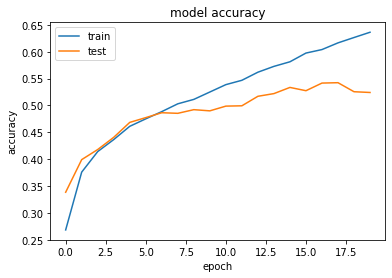

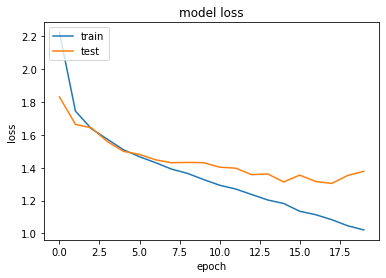

In [0]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Model summary
score = model.evaluate(X_test, Y_test, verbose=0)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1]*100, "%")


Test loss: 1.3785996112823486
Test accuracy: 52.42 %


In [0]:
score = model.evaluate(X_train, Y_train, verbose=0)
print('\nTrain loss:', score[0])
print('Train accuracy:', score[1]*100, "%")


Train loss: 1.0160361834335327
Train accuracy: 64.386 %


##**Hyperparameters taken into account:-**
1. Loss = cross entropy loss
2. no. of layers = 2
3. Initializer = glorot_normal
4. optimizer = adamax
4. Activation func = relu